# The leaky integrate-and-fire (LIF) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from scipy import signal
from copy import copy
from scipy.integrate import odeint
from sympy import symbols, Eq, solve
from tqdm import tqdm
%matplotlib inline

In [2]:
# LIF parameters
V_th = -55
V_reset = -75
tau = 10
g_L = 10
V_init = -75
E_L = -75
t_ref = 2
T = 400
d_t = 0.1
t_span = np.arange(0, T, d_t)

# neuron dynamics
def LIFneuronVF(V, I):
    dv = (-(V - E_L) + (I*1000)/g_L)*d_t/tau
    return dv

In [3]:
# solver
def LIFsolver(V_init, I, t_span):
    V = V_init
    Vs = []
    Vs.append(V_init)
    t = 1
    s = 0
    try:
        while t <= len(t_span):
            dv = LIFneuronVF(V, I[t])
            V = V + dv
            if V >= V_th:
                V = V_reset
                Vs.extend(20*[V])
                t +=20
                s += 1
            else:
                Vs.append(V)
                t +=1
    except IndexError: pass
    return Vs, s

---
### 1.

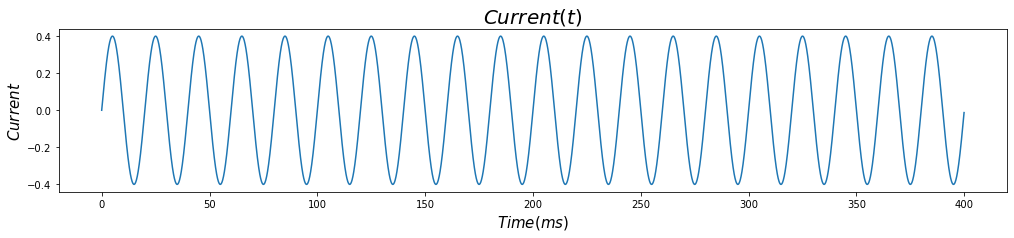

In [4]:
F = 50
amplitude = 0.4
I = np.sin(2*np.pi*F*t_span/1000)*amplitude
plt.figure(figsize=(17,3))
plt.plot(t_span, I)
plt.xlabel('$Time(ms)$', fontsize=15)
plt.ylabel('$Current$', fontsize=15)
plt.title('$Current(t)$', fontsize=20);

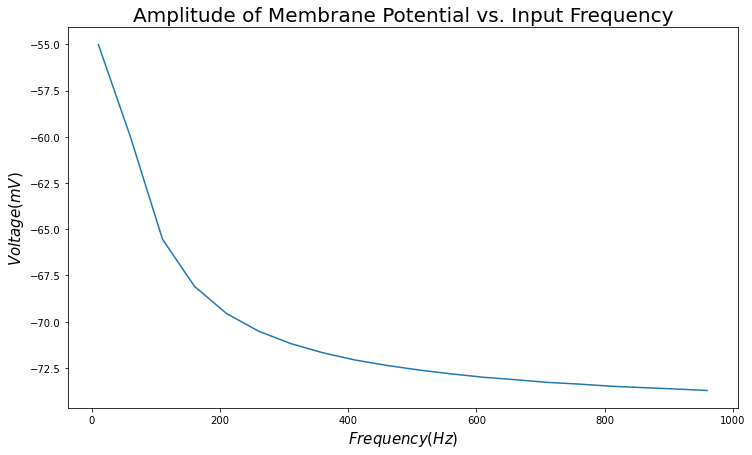

In [5]:
freqs = np.arange(10, 1000, 50)
amps = []
for f in freqs:
    I = np.sin(2*np.pi*f*t_span/1000)*amplitude
    v, s = LIFsolver(V_init, I, t_span)
    amps.append(max(v))
    
plt.figure(figsize=(12,7))
plt.plot(freqs, amps)
plt.xlabel('$Frequency(Hz)$', fontsize=15)
plt.ylabel('$Voltage(mV)$', fontsize=15)
plt.title('Amplitude of Membrane Potential vs. Input Frequency', fontsize=20);

---
### 2.

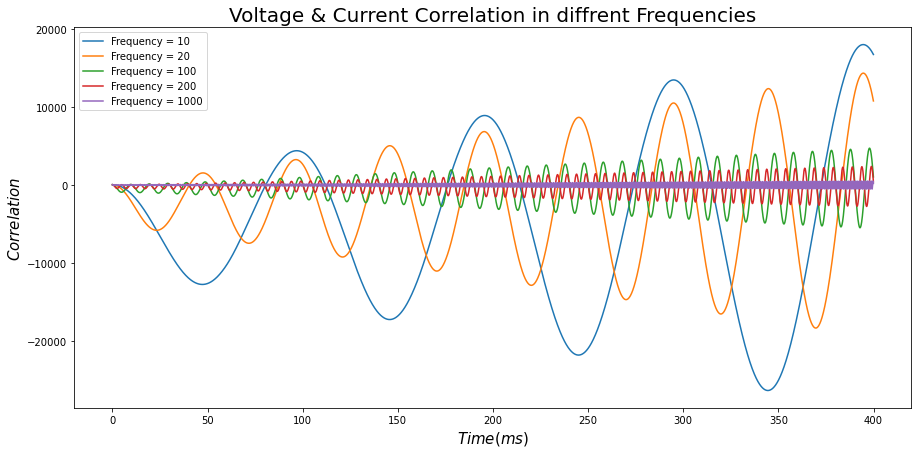

In [6]:
plt.figure(figsize=(15,7))
for f in [10, 20, 100, 200, 1000]:
    I = np.sin(2*np.pi*f*t_span/1000)*amplitude
    v, s = LIFsolver(V_init, I, t_span)
    corr = signal.correlate(I, v)
    plt.plot(t_span, corr[:4000], label='Frequency = %s'%f)
    plt.legend()
    plt.xlabel('$Time(ms)$', fontsize=15)
    plt.ylabel('$Correlation$', fontsize=15)
    plt.title('Voltage & Current Correlation in diffrent Frequencies', fontsize=20);

---
### 3.

number of spikes with current=0.25 : 22


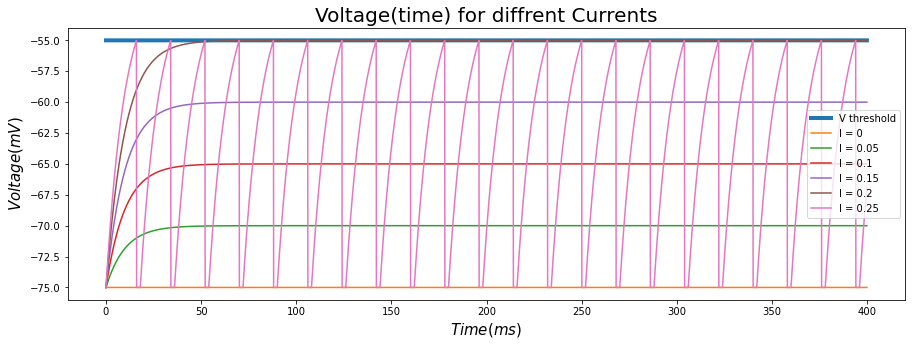

In [7]:
plt.figure(figsize=(15,5))
plt.plot(t_span, V_th*np.ones(t_span.shape), '-', linewidth=4, label='V threshold')
for i in [0, 0.05, 0.1, 0.15, 0.2, 0.25]:
    I = [i]*len(t_span)
    vs, s = LIFsolver(V_init, I, t_span)
    plt.plot(t_span, vs, label='I = %s'%i)
    plt.legend()
    plt.xlabel('$Time(ms)$', fontsize=15)
    plt.ylabel('$Voltage(mV)$', fontsize=15)
    plt.title('Voltage(time) for diffrent Currents', fontsize=20);
    
print('number of spikes with current=0.25 :', s)

---
### 4.

In [8]:
t_ref = 3
amps = np.arange(0, 50, 0.1)
freqs = []
for amp in amps:
    I = amp*np.ones(t_span.shape[0])
    vs, s = LIFsolver(V_init, I, t_span)
    if s > 0:
        temp = np.where(np.array(vs)  == V_reset)
        T = t_span[temp[0][1]] - t_span[temp[0][0]] + t_ref
        f = 1/T
        freqs.append(f)
    else:
        freqs.append(0)

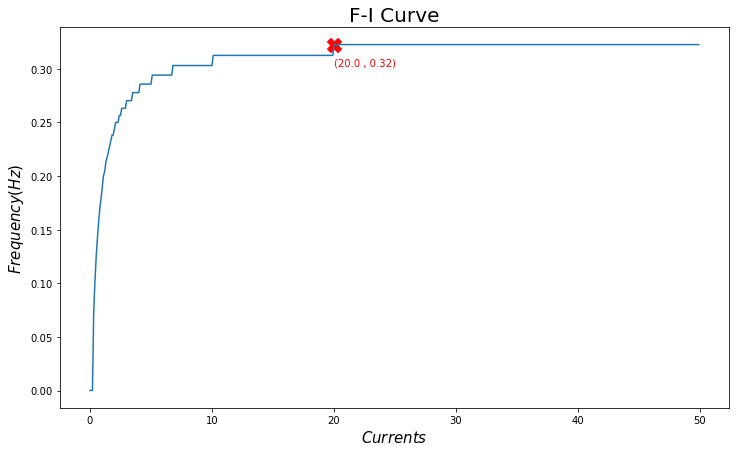

In [9]:
plt.figure(figsize=(12,7))
plt.plot(amps, freqs)
argmax = np.argmax(freqs)
plt.scatter(amps[argmax], freqs[argmax], s=200, c='r', marker='X')
plt.text(amps[argmax], freqs[argmax]-0.02, '(%s , %.2f)'%(amps[argmax], freqs[argmax]), color='r')
plt.xlabel('$Currents$', fontsize=15)
plt.ylabel('$Frequency(Hz)$', fontsize=15)
plt.title('F-I Curve', fontsize=20);

---
<div align=center><font  size="4" color='grey'>end</font></div>

---